In [1]:
#import sys        
#sys.path.append('/Example/File/Location') 
# Location of the common_functions and Clustering

import common_functions as cf
import Clustering as Cluster

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
from matplotlib.colors import ListedColormap

In [2]:
# Import data (needs to be txt and match Renishaw export format)
# Extract wavelengths (w) and the data matrix (data)

name = 'Off_1 - CR - Nf - Bc - Nm.txt'
w = cf.one_variable(name).waves()
data = cf.one_variable(name).DataMat()

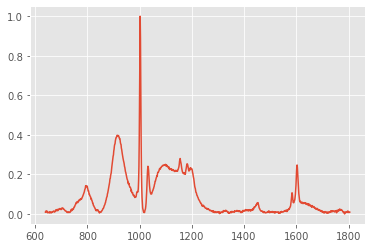

In [3]:
# Check each the rows are spectra

plt.plot(w[::-1],data[15][::-1])
plt.show()

In [4]:
# Create colormap

cmap_KM = ListedColormap(["blue", "red", "green", "yellow","orange"])

In [5]:
# Create k-smeans image using Cluster

df = Cluster.Kmeans_cluster_VRI(name, data, 5)

/tmp/ipykernel_66610/1061880861.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


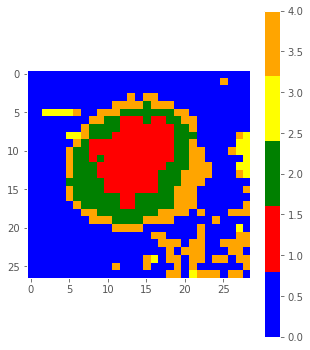

In [6]:
# Plot k-means image

plt.figure(figsize=(5,6))
plt.imshow(df,cmap_KM)
plt.grid(False)
plt.colorbar()
plt.show()

In [7]:
# Assign k-means labels to the dataset

labels = Cluster.Kmeans_labels(data, 5).rename(columns={0:'Labels'})
spectra = pd.DataFrame(data)
X = pd.concat([labels,spectra],axis=1).set_index('Labels')

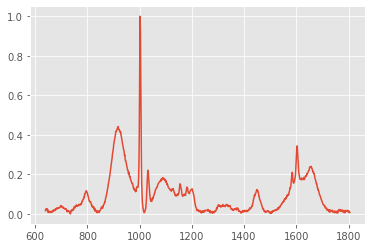

In [8]:
# Inspect the mean averaged spectrum for desired cluster
# To check 

i = 1
plt.plot(w,np.array(X.loc[i].mean()))

In [20]:
# Make dataset from selected clusters

d1 = X.loc[1]
d2 = X.loc[1]
#d3 = X.loc[3]
#d4 = X.loc[4]


fdf = pd.concat([d1,d2],axis=0)
data2 = np.array(fdf)[::-1]

In [21]:
# Select four unique index numbers from the range 
# Only repeat if there are two the same

import random as rand
n_1, n_2, n_3, n_4 = rand.randrange(len(data2)), rand.randrange(len(data2)), rand.randrange(len(data2)), rand.randrange(len(data2))
print(n_1)
print(n_2)
print(n_3)
print(n_4)

111
170
148
147


In [41]:
type(data2)

numpy.ndarray

In [88]:
# Select the four random samples, and an average spectrum for the selected clusters

s1 = pd.DataFrame(data2[n_1,::-1])
s2 = pd.DataFrame(data2[n_2,::-1])
s3 = pd.DataFrame(data2[n_3,::-1])
s4 = pd.DataFrame(data2[n_4,::-1])

ms5 = data2.mean(axis=0)
s5 = pd.DataFrame(s5[::-1])

In [89]:
s5

,0
0,0.017229
1,0.023684
2,0.025964
3,0.026786
4,0.025581
...,...
1010,0.016175
1011,0.012944
1012,0.009532
1013,0.006418


In [91]:
s5.shape

(1015, 1)

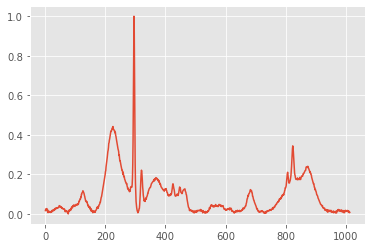

In [90]:
# check the averaged spectrum for the entire dataset
plt.plot(s5)

In [92]:
s1.shape

(1015, 1)

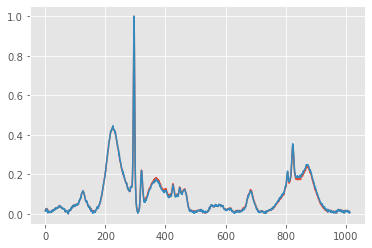

In [94]:
# Compare the spectrum for the averged dataset and a randomly selected spectrum
plt.figure()
plt.plot(s5)
plt.plot(s1)

In [95]:
# combine all into a single dataframe 
df = pd.concat([data_1,data_2,data_3,data_4,data_5],axis=1).T.reset_index(drop=True)

In [96]:
df.shape

(5, 1015)

In [97]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,0.014162,0.019845,0.022441,0.022120,0.026336,0.030378,0.015118,0.018943,0.008331,0.006687,...,0.015056,0.02034,0.015751,0.016476,0.011416,0.019875,0.013179,0.010386,0.009323,0.007133
1,0.018685,0.025536,0.027732,0.028876,0.025473,0.026290,0.014686,0.023328,0.007838,0.006893,...,0.012727,0.01681,0.012422,0.015268,0.009058,0.014424,0.012541,0.008762,0.004727,0.008773


In [98]:
len(df)

5

In [25]:
# Make labels for the image/class you are analysing
labels = []
for i in range(0,len(df)):
    labels.append('SmSq')

lbs = pd.DataFrame(labels).rename(columns={0:'Labels'})

In [26]:
lbs

,Labels
0,SmSq
1,SmSq
2,SmSq
3,SmSq
4,SmSq


In [27]:
df.shape

(5, 1015)

In [28]:
# concat the labels and the selected spectra
DataFrame = pd.concat([lbs,df],axis=1)

In [29]:
DataFrame

,Labels,0,1,2,3,4,5,6,7,8,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,SmSq,829.783752,836.041382,839.186829,844.310852,833.917419,824.207397,819.452393,810.913635,812.828735,...,808.645752,812.704468,817.643555,807.879150,814.392578,808.900818,817.986572,803.847534,802.850769,806.696594
1,SmSq,791.523621,800.431641,812.016663,815.954407,803.245300,792.008972,781.681580,769.717896,769.784790,...,744.864929,744.869751,751.139099,747.573730,742.911560,741.123169,738.278564,736.334106,742.486328,742.009705
2,SmSq,802.036865,811.108215,822.397217,826.527222,811.458801,801.131226,795.936096,777.219666,782.476685,...,760.388245,762.111816,766.265320,760.951477,760.688660,753.167725,756.856995,748.544006,757.648071,757.880615
3,SmSq,810.653687,818.236512,825.601746,830.132629,818.581359,808.108184,800.566986,790.315765,791.306763,...,776.755340,778.787110,784.391327,777.726440,778.652069,775.011994,778.132568,770.090820,772.668549,774.353149
4,SmSq,833.042136,839.062149,845.382756,847.961264,840.088561,830.613458,818.944345,816.651306,810.354166,...,837.245623,837.705004,845.473504,839.573685,837.823488,839.338837,839.902109,837.957582,835.635638,837.705921


In [34]:
# Save the final dataframe 
DataFrame.to_csv(name+' DataFrame.csv')